# 本节大纲

1. 版本介绍，15分钟
2. 嵌入模型，30分钟
3. 向量数据库，30分钟
4. 大语言模型，30分钟
5. 答疑和总结，15分钟

In [1]:
!pip install sentence-transformers pymilvus

### 小墨 v0.3 介绍

![v0.3](./resource/images/v0.3.png)

### 核心就在于三驾马车
1. 嵌入模型私有化
2. 向量数据库私有化
3. 大语言模型私有化

### 私有化，肯定要涉及到基础设施的部署

通常是五部曲
1. 购买硬件/云服务器（Dell、IBM、Cloud..）
3. 安装操作系统（Ubuntu、CentOS..）
4. 打上显卡驱动（NVIDIA Drive）
5. 选择算法框架及计算架构 （PyTorch-Meta, TensorFlow-Google, MindSpore-Huawei...）（CUDA）
6. 运行对应的模型（Embedding、Language...）

### 魔法，还是得通过魔法打败

In [ ]:
# 问题：无法下载到模型权重

# 方式一： HuggingFace Mirror
# https://aliendao.cn/

# 方式二：国内平替，例如阿里云摩搭
# https://www.modelscope.cn/

In [ ]:
# 问题：没有本地算力资源

# 方式一：用第三方租用，例如 AWS、腾讯云的 GPU 实例

# 方式二：第三方托管（开源模型），例如阿里云灵积直接调用 API（某种意义上也可以做到可控）
# https://dashscope.console.aliyun.com/

### 第一架马车：Embedding Model

In [ ]:
# 开源模型有很多，也可以自己来根据业务训练（例如专注于零售、医疗、供应链领域..）
# 选择一个性能不错的，可以开箱即用的 (Moka Massive Mixed Embedding)
# https://huggingface.co/moka-ai/m3e-large

In [2]:
# 很简单的工作过程，输入n个句子，给回n个d维度的向量

from sentence_transformers import SentenceTransformer
embed_model = SentenceTransformer(model_name_or_path="./weights/embedding/m3e-large/")

sentence = ['How are you', "你好", "Bonjour"]

vectors = embed_model.encode(sentence)

No sentence-transformers model found with name ./weights/embedding/m3e-large/. Creating a new one with MEAN pooling.


In [3]:
print(f'提供有 {len(vectors)} 个向量，每个向量有 {len(vectors[0])} 维度')

提供有 3 个向量，每个向量有 1024 维度


In [4]:
vectors.shape

(3, 1024)

In [5]:
vectors

array([[ 5.9009928e-02, -9.8295927e-02,  5.1568592e-01, ...,
         9.7195542e-01, -1.5779861e+00,  1.0853946e-03],
       [-3.7582135e-01,  8.0404276e-01, -1.3980484e-01, ...,
         6.3225293e-01, -9.5478934e-01,  3.5053524e-01],
       [-6.9274282e-01,  7.6224732e-01, -4.0011904e-03, ...,
         1.5449513e-01, -1.7018709e+00, -4.8794255e-01]], dtype=float32)

In [1]:
# 不同的模型，有不同的维度，维度越多，能表达的信息量越多
# 同一个模型，也有不同的尺寸，例如 m3e 中的 small, base, large 

from sentence_transformers import SentenceTransformer
m3e_small = SentenceTransformer(model_name_or_path="./weights/embedding/m3e-small/")
vectors = m3e_small.encode("Hello")
vectors.shape

(512,)

In [2]:
!nvidia-smi

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Fri Oct  6 23:49:18 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.98                 Driver Version: 535.98       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA 

In [1]:
from sentence_transformers import SentenceTransformer
m3e_base = SentenceTransformer(model_name_or_path="./weights/embedding/m3e-base/")
vectors = m3e_base.encode("Hello")
vectors.shape

(768,)

In [2]:
!nvidia-smi

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Fri Oct  6 23:49:38 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.98                 Driver Version: 535.98       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA 

In [1]:
from sentence_transformers import SentenceTransformer
m3e_large = SentenceTransformer(model_name_or_path="./weights/embedding/m3e-large/")
vectors = m3e_large.encode("Hello")
vectors.shape

No sentence-transformers model found with name ./weights/embedding/m3e-large/. Creating a new one with MEAN pooling.


(1024,)

In [2]:
!nvidia-smi

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Fri Oct  6 23:50:00 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.98                 Driver Version: 535.98       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA 

#### 关键：如何评估模型的效果？

In [ ]:
# 在一个多维空间里面，距离可以来评估相似度
# 那么目标函数可以定义为，语义越相似的句子距离越近，越不相似的句子距离越远

In [1]:
import numpy as np
from sentence_transformers import SentenceTransformer
embed_model = SentenceTransformer(model_name_or_path="./weights/embedding/m3e-large/")

No sentence-transformers model found with name ./weights/embedding/m3e-large/. Creating a new one with MEAN pooling.


In [2]:
# 语义都是打招呼，但是不同语言表达

# 原始文本
sentences = ['你好', "Hello", "Benjour"]

# 向量化
vectors = embed_model.encode(sentences)

# 相似度计算
l2_distances = np.linalg.norm((vectors[0] - vectors), axis=1)
l2_distances

array([ 0.      , 17.78149 , 30.888874], dtype=float32)

In [3]:
# 语义不一样时

# 原始文本
sentences = ["瑶瑶是墨问西东颜值最高的女孩子", "你好", "Hello", "Benjour"]

# 向量化
vectors = embed_model.encode(sentences)

# 相似度计算
l2_distances = np.linalg.norm((vectors[0] - vectors), axis=1)
l2_distances

array([ 0.      , 31.430096, 32.619556, 33.663322], dtype=float32)

In [4]:
# 均是中文时

# 原始文本
sentences = ["早上好", "午安", "晚安"]

# 向量化
vectors = embed_model.encode(sentences)

# 相似度计算
l2_distances = np.linalg.norm((vectors[0] - vectors), axis=1)
l2_distances

array([ 0.      , 22.221102, 19.63204 ], dtype=float32)

In [5]:
# 真实场景

# 原始文本
sentences = ["小盖是谁", "小盖是墨问西东最帅的男人。", "瑶瑶是墨问西东的颜值担当，遥遥领先。",
             "这个季节就是皮肤的水分流失相当快，要特别注重补水哦！我们新出了一款产品，使用后皮肤水汪汪的，滋润而不油腻。是我们卖的最好的明星产品之一。"]

# 向量化
vectors = embed_model.encode(sentences)

# 相似度计算
l2_distances = np.linalg.norm((vectors[0] - vectors), axis=1)
l2_distances

array([ 0.      , 22.924166, 30.93319 , 31.255424], dtype=float32)

#### 技巧

In [ ]:
# 工程挑战，召回大量的知识，但是需要做抑制
# 通过比对试验选择一个合适的阈值，
# m3e large 这样看起来应该是 <20 (经验值)

#### 可视化向量结果

In [6]:
# 问题：向量都是一堆数据，我也不知道是什么含义
#      而且我最多只能理解一维, 二维, 三维世界，更多维度我也不知道怎么想象出来

In [7]:
# 原始文本
sentences = [ "你好", "早上好", "中午好", "晚上好",
             "小盖是谁", "小盖是墨问西东最帅的男人。", 
             "瑶瑶是墨问西东的颜值担当，遥遥领先。",
             "这个季节就是皮肤的水分流失相当快，要特别注重补水哦！我们新出了一款产品，使用后皮肤水汪汪的，滋润而不油腻。是我们卖的最好的明星产品之一。"]

# 文本标签 
labels = [0, 0, 0, 0, 1, 1, 2, 3] 

# 向量化
vectors = embed_model.encode(sentences)

In [8]:
# 既然只能理解二维，那没有问题，我们把向量降维，不就可以了
from sklearn.manifold import TSNE

# 创建 t-SNE 模型来处理数据
tsne = TSNE(n_components=2, perplexity=2, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(vectors)
vis_dims.shape

(8, 2)

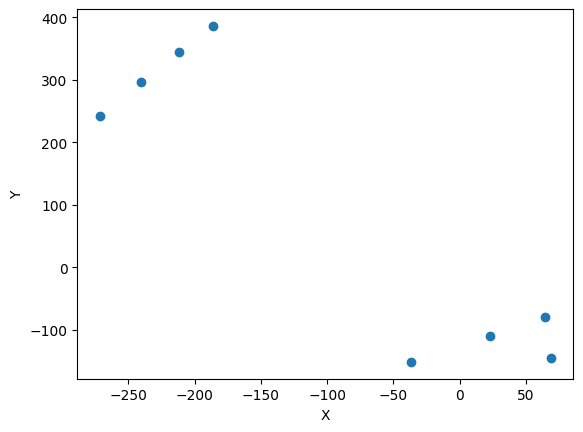

In [10]:
# 可视化下二维情况下的向量空间
import matplotlib.pyplot as plt

x = [point[0] for point in vis_dims]
y = [point[1] for point in vis_dims]

plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

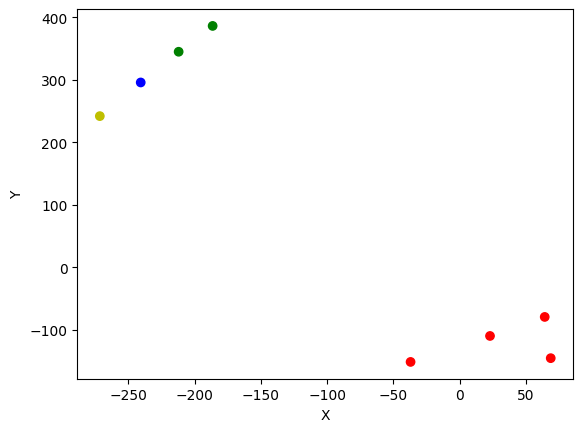

In [11]:
# 但是不知道上面的那一个点是什么意思
# 我们有标签值来代表他是什么类别，所以我们可以根据不同的类别来显示不同的颜色
# 只要颜色一样的距离是相近的，那也可以表达出语义是相似的

color_map = ['r', 'g', 'b', 'y']
colors = [color_map[lab] for lab in labels]

x = [point[0] for point in vis_dims]
y = [point[1] for point in vis_dims]

plt.scatter(x, y, color=colors)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [13]:
# 既然可以二维，那就继续试试三维
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
data_transformed = pca.fit_transform(vectors)
data_transformed.shape

(8, 3)

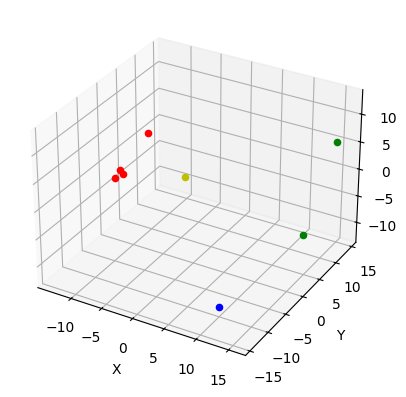

In [15]:
# 可视化下三维情况下的向量空间

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b', 'y']
for i in range(len(data_transformed)):
    ax.scatter(data_transformed[i, 0], data_transformed[i, 1],
    data_transformed[i, 2], c=colors[labels[i]])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

### 第二架马车：Vector Database

In [16]:
# 用传统的数据库来做存储功能也可以，但是基于向量查询就需要在程序内存中处理
# 支持私有化部署，对于扩展性、可用性、性能都有高要求 （Milvus）
# https://milvus.io/docs

In [17]:
# 哟哟切克闹，增删查改来一套

from pymilvus import connections, utility, Collection, db, CollectionSchema, FieldSchema, DataType

connections = connections.connect(host="127.0.0.1", port=19530, user="root", password="")

#### Database

In [18]:
# 默认系统会自动创建一个名为 default 的数据库
database_name = "mowenxidong"

In [19]:
# 创建一个数据库
db.create_database(database_name)

In [20]:
# 查看实例下有多少个数据库
db.list_database()

['default', 'mowenxidong']

In [21]:
# 删库跑路
db.drop_database(database_name)

#### Collection

In [22]:
# Collection 类似传统数据库中的 Table 概念
database_name = "default"
collection_name = "mobot"

In [25]:
# 创建集合

# 1. 声明 Field 类型及属性
fields = [
    FieldSchema(name="id", dtype=DataType.INT64, is_primary=True),
    FieldSchema(name="question", dtype=DataType.VARCHAR, max_length=1000),
    FieldSchema(name="answer", dtype=DataType.VARCHAR, max_length=1000),
    FieldSchema(name="embedding", dtype=DataType.FLOAT_VECTOR, dim=1024)
]

# 2. 根据字段声明 Schema
schema = CollectionSchema(
    fields=fields,
    description="",
    enable_dynamic_field=True
)

# 3. 根据 Schema 声明 Collection
collection = Collection(
    name=collection_name,
    schema=schema,
    using=database_name,
)

# 4. 创建 Field 的索引
index_params = {
    'index_type': "IVF_FLAT",
    'metric_type': "L2",
    'params': {'nlist': 1}
}
collection.create_index(field_name="embedding", index_params=index_params)

# 5. 挂载 Collection，变成可用状态
collection.load()

In [26]:
# 查看 Collection 详情
Collection(collection_name)

<Collection>:
-------------
<name>: mobot
<description>: 
<schema>: {'auto_id': False, 'description': '', 'fields': [{'name': 'id', 'description': '', 'type': <DataType.INT64: 5>, 'is_primary': True, 'auto_id': False}, {'name': 'question', 'description': '', 'type': <DataType.VARCHAR: 21>, 'params': {'max_length': 1000}}, {'name': 'answer', 'description': '', 'type': <DataType.VARCHAR: 21>, 'params': {'max_length': 1000}}, {'name': 'embedding', 'description': '', 'type': <DataType.FLOAT_VECTOR: 101>, 'params': {'dim': 1024}}], 'enable_dynamic_field': True}

In [24]:
# 删库大法
utility.drop_collection(collection_name)

In [27]:
# 判断 Collection 是否存在
utility.has_collection(collection_name)

True

#### Document

In [28]:
# 新增数据
knowledge_base = [
    {"question": "小盖是谁", "answer": "小盖是墨问西东最帅的男人。"},
    {"question": "瑶瑶是谁", "answer": "瑶瑶是墨问西东的颜值担当，遥遥领先。"},
    {"question": "皮肤很干", "answer": "这个季节就是皮肤的水分流失相当快，要特别注重补水哦！我们新出了一款产品，使用后皮肤水汪汪的，滋润而不油腻。是我们卖的最好的明星产品之一。"}

]

ids, questions, answers, vectors = [], [], [], []

for i in range(len(knowledge_base)):
    ids.append(i+1)
    questions.append(knowledge_base[i]['question'])
    answers.append(knowledge_base[i]['answer'])
    vectors.append(embed_model.encode(f'{knowledge_base[i]["question"]}\n\n{knowledge_base[i]["answer"]}'))


entities = [ids, questions, answers, vectors]

collection.insert(entities)
collection.flush()

In [29]:
# 基于向量的相似度搜索

data = embed_model.encode(["爆嗮之后掉皮"])
top_k = 3

documents = collection.search(
    data=data,
    anns_field="embedding",
    param={"metric_type": "L2", "params": {"nprobe": 1}, "offset": 0},
    limit=top_k,
    output_fields=["*"]
)

In [30]:
for i in range(len(documents[0])):
    print(documents[0][i].id)
    print(documents[0][i].distance)
    print(documents[0][i].entity.get('question'))
    print(documents[0][i].entity.get('answer'))
    print('----------------')

3
856.0146484375
皮肤很干
这个季节就是皮肤的水分流失相当快，要特别注重补水哦！我们新出了一款产品，使用后皮肤水汪汪的，滋润而不油腻。是我们卖的最好的明星产品之一。
----------------
1
1062.521484375
小盖是谁
小盖是墨问西东最帅的男人。
----------------
2
1079.0732421875
瑶瑶是谁
瑶瑶是墨问西东的颜值担当，遥遥领先。
----------------


In [31]:
# 基于标量的查询
expr = 'id != 3'

documents = collection.query(
    expr=expr,
    offset=0,
    limit=top_k,
    output_fields=["*"]
)

In [32]:
for i in range(len(documents)):
    print(documents[i]['id'])
    print(documents[i]['question'])
    print(documents[i]['answer'])
    print('----------------')

1
小盖是谁
小盖是墨问西东最帅的男人。
----------------
2
瑶瑶是谁
瑶瑶是墨问西东的颜值担当，遥遥领先。
----------------


In [33]:
# 混合检索
data = embed_model.encode(["爆嗮之后掉皮"])
expr = 'id != 3'

documents = collection.search(
    data=data,
    anns_field="embedding",
    param={"metric_type": "L2", "params": {"nprobe": 1}, "offset": 0},
    limit=top_k,
    output_fields=["*"],
    expr=expr
)

In [34]:
for i in range(len(documents[0])):
    print(documents[0][i].id)
    print(documents[0][i].distance)
    print(documents[0][i].entity.get('question'))
    print(documents[0][i].entity.get('answer'))
    print('----------------')

1
1062.521484375
小盖是谁
小盖是墨问西东最帅的男人。
----------------
2
1079.0732421875
瑶瑶是谁
瑶瑶是墨问西东的颜值担当，遥遥领先。
----------------


In [35]:
# 删除前先查下是否存在
expr = 'id in [3]'

documents = collection.query(
    expr=expr,
    offset=0,
    limit=top_k,
    output_fields=["*"]
)

print(len(documents))

1


In [36]:
# 删除数据
collection.delete(expr)

(insert count: 0, delete count: 1, upsert count: 0, timestamp: 444769705428254721, success count: 0, err count: 0)

In [37]:
# 再查一下，看看是否还存在
documents = collection.query(
    expr=expr,
    offset=0,
    limit=top_k,
    output_fields=["*"]
)

print(len(documents))

0


#### 知识点：向量数据库除了做对话场景，还能发挥什么能力

In [6]:
# Embedding Use Case
# https://platform.openai.com/docs/guides/embeddings/use-cases
# 图片搜索、音频搜索、文本搜索、商品推荐...

### 第三架马车：Large Language Model

In [40]:
# 在上节课，我们说到了大模型在对话系统中，其实最关键的就是他的推理能力

# 核心是如何选择一个大语言模型？

In [41]:
# Llama2 呼声很高，但是实际投产适用吗？
# https://replicate.com/meta/llama-2-70b-chat
# https://replicate.com/meta/llama-2-13b-chat
# https://replicate.com/meta/llama-2-7b-chat

# 我们来小试一下, 但发现好像中文场景下很糟糕

In [42]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

model_path = './weights/language/llama2-chinese-chat-7b/'

model = AutoModelForCausalLM.from_pretrained(
    pretrained_model_name_or_path=model_path, 
    device_map='auto', 
    torch_dtype=torch.float16
)
model = model.eval()

tokenizer = AutoTokenizer.from_pretrained(
    pretrained_model_name_or_path=model_path, 
    use_fast=False)
tokenizer.pad_token = tokenizer.eos_token

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/home/ml/anaconda3/envs/mobot/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:362: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/home/ml/anaconda3/envs/mobot/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:367: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(


In [43]:
# 来看看需要多少显存开销
!nvidia-smi

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Fri Oct  6 23:58:19 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.98                 Driver Version: 535.98       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA 

In [44]:
def Llama2Completion(prompt):
    input_ids = tokenizer([prompt], return_tensors="pt", add_special_tokens=False).input_ids.to('cuda')

    generate_input = {
        "input_ids": input_ids,
        "max_new_tokens": 512,  # max is 4096
        "do_sample": False,
        "top_p": 1,
        "temperature": 0.1,
        "repetition_penalty": 1,
        "eos_token_id": tokenizer.eos_token_id,
        "bos_token_id": tokenizer.bos_token_id,
        "pad_token_id": tokenizer.pad_token_id
    }

    generate_ids = model.generate(**generate_input)
    return tokenizer.decode(generate_ids[0])

In [45]:
# 试试最简单的问题

prompt = """
<s>Human: 
知识库：
瑶瑶是谁? 瑶瑶是墨问西东的颜值担当，遥遥领先。
小盖是谁? 小盖是墨问西东最帅的男人。
池建强是谁？ 池老师是墨问西东的创始人兼CEO。

请根据知识库推理出：小盖是什么
</s>
<s>Assistant:
"""

print(Llama2Completion(prompt))

/home/ml/anaconda3/envs/mobot/lib/python3.10/site-packages/transformers/generation/utils.py:1417: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation )
  warnings.warn(
/home/ml/anaconda3/envs/mobot/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:362: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.1` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(



<s>Human: 
知识库：
瑶瑶是谁? 瑶瑶是墨问西东的颜值担当，遥遥领先。
小盖是谁? 小盖是墨问西东最帅的男人。
池建强是谁？ 池老师是墨问西东的创始人兼CEO。

请根据知识库推理出：小盖是什么
</s>
<s>Assistant:
小盖是墨问西东最帅的男人。

因此，小盖可能是一个男性，或者一个虚拟人物，被认为是墨问西东最帅的男人。
</s>


In [46]:
# 再试试有难度的
prompt = """
<s>Human: 
知识库：
瑶瑶是谁? 瑶瑶是墨问西东的颜值担当，遥遥领先。
小盖是谁? 小盖是墨问西东最帅的男人。
池建强是谁？ 池老师是墨问西东的创始人兼CEO。

请根据知识库推理出：瑶瑶和小盖是什么关系
</s>
<s>Assistant:
"""

print(Llama2Completion(prompt))


<s>Human: 
知识库：
瑶瑶是谁? 瑶瑶是墨问西东的颜值担当，遥遥领先。
小盖是谁? 小盖是墨问西东最帅的男人。
池建强是谁？ 池老师是墨问西东的创始人兼CEO。

请根据知识库推理出：瑶瑶和小盖是什么关系
</s>
<s>Assistant:
瑶瑶和小盖是墨问西东的员工。
</s>


In [47]:
# 对于记忆力的场景
prompt = """
<s>Human: 小盖是谁？</s>
<s>Assistant: 小盖是墨问西东最帅的男人。</s>
<s>Human: 瑶瑶是谁? </s>
<s>Assistant: 瑶瑶是墨问西东的颜值担当，遥遥领先。</s>
<s>Human: 那他俩是啥关系？</s>
<s>Assistant: 
"""

print(Llama2Completion(prompt))


<s>Human: 小盖是谁？</s>
<s>Assistant: 小盖是墨问西东最帅的男人。</s>
<s>Human: 瑶瑶是谁? </s>
<s>Assistant: 瑶瑶是墨问西东的颜值担当，遥遥领先。</s>
<s>Human: 那他俩是啥关系？</s>
<s>Assistant: 
小盖和瑶瑶是墨问西东的两位主演，他们在剧中扮演了男女主角的角色。小盖扮演的是男主角，是一个勇敢、善良、热情的人，而瑶瑶则扮演的是女主角，是一个坚韧、勇敢、善良的人。两人在剧中展现了着深深的情感关系，彼此相爱，但却因为各自的缺陷和困难而受到困扰。最终，他们通过努力和尊重，才能找到了真正的爱情和幸福。

总之，小盖和瑶瑶是墨问西东的两位主演，他们在剧中展现了着深深的情感关系，彼此相爱，但却因为各自的缺陷和困难而受到困扰。最终，他们通过努力和尊重，才能找到了真正的爱情和幸福。
</s>


In [48]:
# 看起来对于 Llama2-Chinese-7B 
# 推理能力还是一个比较弱的能力

# 那就试试更大参数量的模型（只有参数量超过一定的程度才会出现能力涌现）
# 但我们显存有限，只有 16G，而且在推理时内存会不停上涨

# 用量化的模型，就可以减少内存开销，例如 float16 -> int4
# 4 位量化 LLaMA 模型的 GPU 要求：
# LLaMA Model	Minimum VRAM Requirement	Recommended GPU Examples
# LLaMA-7B	6GB	    RTX 3060, GTX 1660, 2060, AMD 5700 XT, RTX 3050
# LLaMA-13B	10GB	AMD 6900 XT, RTX 2060 12GB, 3060 12GB, 3080, A2000
# LLaMA-30B	20GB	RTX 3080 20GB, A4500, A5000, 3090, 4090, 6000, Tesla V100, Tesla P40
# LLaMA-65B	40GB	A100 40GB, 2x3090, 2x4090, A40, RTX A6000, A8000

In [1]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

model_path = './weights/language/qwen-14b-chat-int4/'

model = AutoModelForCausalLM.from_pretrained(
    pretrained_model_name_or_path=model_path, 
    device_map='auto', 
    trust_remote_code=True
).eval()

tokenizer = AutoTokenizer.from_pretrained(
    pretrained_model_name_or_path=model_path, 
    trust_remote_code=True
)

Try importing flash-attention for faster inference...


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

In [2]:
# 来看看需要多少显存开销
!nvidia-smi

Sat Oct  7 00:00:00 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.98                 Driver Version: 535.98       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4090 ...    Off | 00000000:01:00.0 Off |                  N/A |
| N/A   50C    P0              36W / 150W |  10095MiB / 16376MiB |      3%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
# 来试试 13B 参数量的模型，能力如何？

# 试试最简单的问题

prompt = """
知识库：
瑶瑶是谁? 瑶瑶是墨问西东的颜值担当，遥遥领先。
小盖是谁? 小盖是墨问西东最帅的男人。
池建强是谁？ 池老师是墨问西东的创始人兼CEO。

请根据知识库回答：小盖是什么
"""

response, history = model.chat(tokenizer, prompt, history=None)
print(response)

小盖是墨问西东最帅的男人。


In [4]:
# 再试试有难度的
prompt = """
知识库：
瑶瑶是谁? 瑶瑶是墨问西东的颜值担当，遥遥领先。
小盖是谁? 小盖是墨问西东最帅的男人。
池建强是谁？ 池老师是墨问西东的创始人兼CEO。

请根据知识库回答：瑶瑶和小盖是什么关系
"""

response, history = model.chat(tokenizer, prompt, history=None)
print(response)

根据知识库，瑶瑶是墨问西东的颜值担当，遥遥领先；小盖是墨问西东最帅的男人。因此，瑶瑶和小盖都是墨问西东的人，但具体关系未知。


In [5]:
# 对于记忆力的场景
prompt = """
Human: 小盖是谁？
Assistant: 小盖是墨问西东最帅的男人。
Human: 瑶瑶是谁? 
Assistant: 瑶瑶是墨问西东的颜值担当，遥遥领先。
Human: 那他俩是啥关系？
Assistant:
"""

response, history = model.chat(tokenizer, prompt, history=None)
print(response)

小盖和瑶瑶是同事关系，同在墨问西东团队中担任自然语言处理相关的研发工作。


#### 模型选择技巧

In [ ]:
# 7B参数量的模型 float16 需要14G显存！

# 13B参数量的模型 int4 量化 显存只需要9G显存，开销更低！性能表现更好

# 工程上选择更大参数量的模型去做量化！

In [ ]:
# LLMs Leader Board
# https://opencompass.org.cn/leaderboard-llm

### 总结和回顾